<a href="https://colab.research.google.com/github/Teja023/Flight-Fare-prediction/blob/main/FlightFarePredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi


NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [145]:
import pandas as pd


In [166]:
data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/flightfare/Data_Train.xlsx")
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [167]:
data.dropna(inplace = True)

In [168]:
data.shape

(10682, 11)

In [169]:
data["journey_DAY"] = pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [170]:
data["journey_MONTH"] = pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.month

In [151]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_DAY,journey_MONTH
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [171]:
data["Journey_day"] = pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.day
data["Journey_mon"] = pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.month
data.drop("Date_of_Journey", axis=1, inplace=True)
data["Dep_hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour
data["Dep_min"] = pd.to_datetime(data["Dep_Time"]).dt.minute
data.drop("Dep_Time", axis=1, inplace=True)

In [153]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_DAY,journey_MONTH,Journey_day,Journey_mon,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,1,3,16,50


In [172]:
data["Arr_hour"] = pd.to_datetime(data["Arrival_Time"]).dt.hour
data["Arr_min"] = pd.to_datetime(data["Arrival_Time"]).dt.minute
data.drop("Arrival_Time", axis=1, inplace=True)

In [ ]:
data.head()

In [173]:
data.drop(["journey_DAY"], axis=1, inplace=True)
data.drop(["journey_MONTH"], axis=1, inplace=True)

In [ ]:
data.head()

In [174]:
duration = list(data["Duration"])

for i in range(len(duration)):
  if len(duration[i].split()) != 2:
    if "h" in duration[i]:
      duration[i] = duration[i] + " 0m"
    else :
      duration [i] = "0h " + duration[i]
  
duration_hours = []
duration_mins = []

for i in range(len(duration)):
  duration_hours.append(int(duration[i].split(sep = "h")[0]))
  duration_mins.append(int(duration[i].split(sep = "m")[0].split(sep="h ")[-1]))
  
data["Duration_Hours"] = duration_hours
data["Duration_Mins"] = duration_mins
data.drop(["Duration"], axis=1, inplace=True)

In [ ]:
data.head()

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt


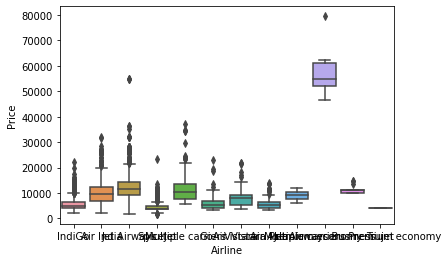

In [ ]:
sns.boxplot(x=data["Airline"], y=data["Price"], data=data)

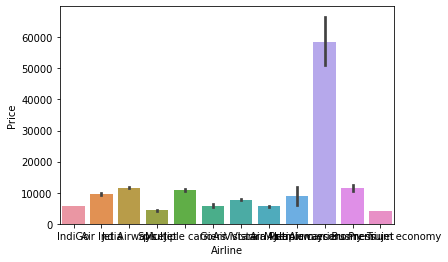

In [ ]:
sns.barplot(x=data["Airline"], y=data["Price"])

In [176]:
Airline = data[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


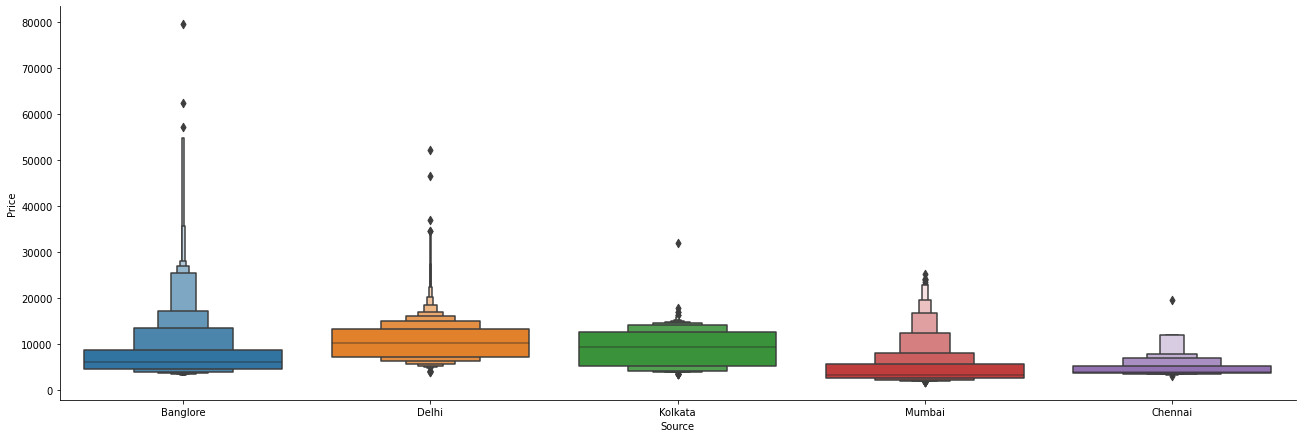

In [ ]:
sns.catplot(y = "Price", x="Source", data=data.sort_values("Price", ascending=False), kind="boxen", height=6, aspect=3)

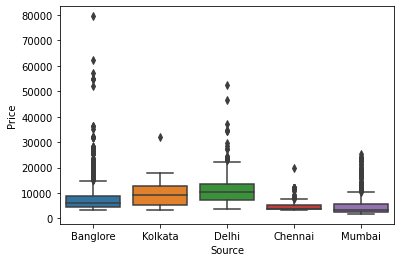

In [ ]:
sns.boxplot(x="Source", y="Price", data=data, width=0.8 )

In [177]:
Source = data[["Source"]]
Source = pd.get_dummies(Source, drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [178]:
Destination = data[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [ ]:
data.head()

In [179]:
data.drop(["Route", "Source", "Destination"], axis=1, inplace=True)

In [ ]:
data.head()

In [180]:
data1 = data.replace({"non-stop":0, "1 stop":1, "2 stops":2, "3 stops":3, "4 stops":4})

In [ ]:
data1.head()

In [181]:
data1.drop("Additional_Info", axis=1, inplace=True)

In [182]:
train_data = pd.concat([data1, Airline, Source, Destination], axis=1 )
train_data.head()

,Airline,Total_Stops,Price,Journey_day,Journey_mon,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_Hours,Duration_Mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [183]:
train_data.drop("Airline", axis=1, inplace=True)

In [184]:
train_data.head()

,Total_Stops,Price,Journey_day,Journey_mon,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_Hours,Duration_Mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [185]:
train_data.shape

(10682, 30)

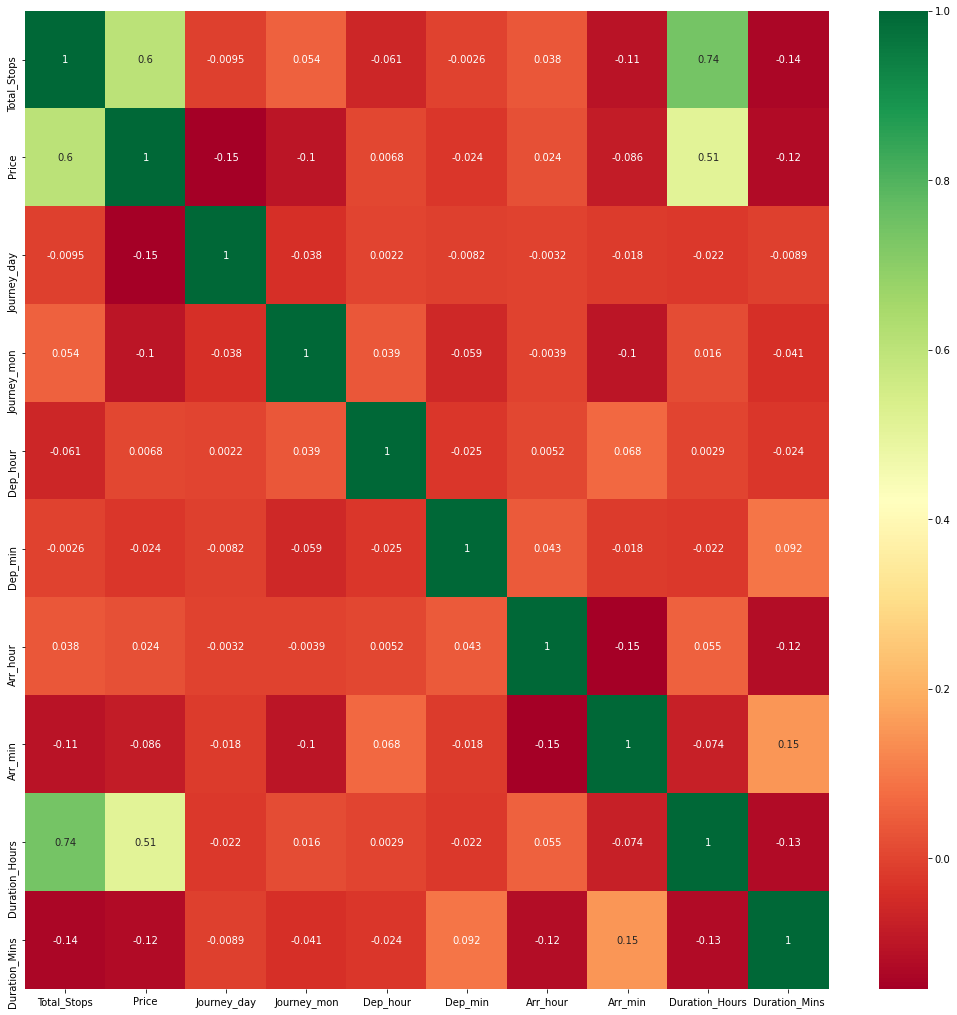

In [ ]:
plt.figure(figsize=(18, 18))
sns.heatmap(data=data1.corr(), annot=True)
plt.show()

In [186]:
X = train_data.loc[:, ['Total_Stops', 'Journey_day', 'Journey_mon', 'Dep_hour',
       'Dep_min', 'Arr_hour', 'Arr_min', 'Duration_Hours',
       'Duration_Mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_mon,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_Hours,Duration_Mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [187]:
print(X.shape)
print(train_data.shape)

(10682, 29)
(10682, 30)


In [188]:
Y = train_data.iloc[:, 1]
Y.shape

(10682,)

In [189]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size = 0.2, random_state = 42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((8545, 29), (2137, 29), (8545,), (2137,))

In [190]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [191]:
lin_reg = LinearRegression()
rnf_reg = RandomForestRegressor()
svm_reg = SVR(kernel='rbf')



In [192]:
for reg in (lin_reg, svm_reg):
  reg.fit(X_train, y_train)
  y_pred = reg.predict(X_train)
  print(reg.__class__.__name__ , mean_absolute_error(y_train, y_pred),mean_squared_error(y_train, y_pred))

LinearRegression 1946.2117258519147 7965492.818418413
SVR 3525.441190707335 21133610.15917008


In [198]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [195]:
for reg in (lin_reg, svm_reg):
  reg.fit(X_train_scaled, y_train)
  y_pred = reg.predict(X_train_scaled)
  print(reg.__class__.__name__ , mean_absolute_error(y_train, y_pred),mean_squared_error(y_train, y_pred))

LinearRegression 1946.2031392085103 7965494.245394874
SVR 3381.4643971365626 19992085.714100443


In [199]:
for clf in (lin_reg, svm_reg):
  clf.fit(X_train_scaled, y_train)
  y_pred = clf.predict(X_val_scaled)
  print(clf.__class__.__name__ , mean_absolute_error(y_val, y_pred),mean_squared_error(y_val, y_pred))

LinearRegression 1972.9792413109565 8202407.838154361
SVR 3412.0229289233957 20355422.239550713


In [205]:
rnf_reg.fit(X_train,y_train)
pre = rnf_reg.predict(X_train)
print(clf.__class__.__name__ , mean_absolute_error(y_train, pre),mean_squared_error(y_train, pre))

SVR 570.2131154994865 976476.3862635937


In [206]:
rnf_reg.fit(X_train,y_train)
pre = rnf_reg.predict(X_val)
print(clf.__class__.__name__ , mean_absolute_error(y_val, pre),mean_squared_error(y_val, pre))

SVR 1177.3263307991338 4386526.449978932


In [200]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [207]:
n_estimators = [int(x) for x in np.linspace(10,1000,10) ]
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [210]:
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [211]:
rf_random = RandomizedSearchCV(estimator = rnf_reg, param_distributions=random_grid)

In [212]:
rf_random.fit(X_train,y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                           

In [213]:
rf_random.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 450}

In [215]:
prediction = rf_random.predict(X_val)
mean_absolute_error(y_val, prediction), mean_squared_error(y_val, prediction)


(1164.8169607634168, 4281576.719324316)